<a href="https://colab.research.google.com/github/axleer/Math/blob/master/ML/Gym/SGDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
x = torch.tensor(np.arange(1, 11, 0.02), dtype=torch.float).view(500, 1)
y = torch.pow(torch.sin(x), 2.0) + torch.cos(x * 2) * 10

In [ ]:
model = nn.Sequential(
    nn.Linear(1, 20),
    nn.Tanh(),
    nn.Linear(20, 20),
    nn.Tanh(),
    nn.Linear(20, 1),
)

# model = nn.Sequential(
#     nn.Linear(1, 10),
#     nn.Tanh(),
#     nn.Linear(10, 10),
#     nn.Tanh(),
#     nn.Linear(10, 1),
# )

optim = torch.optim.SGD(model.parameters(), lr=5 * 1e-4, momentum=0.95)
mse = nn.MSELoss()

error = []

for i in range(10000):
    predict = model(x)
    loss = mse(predict, y)
    error.append(loss.item())
    optim.zero_grad()
    loss.backward()
    optim.step()

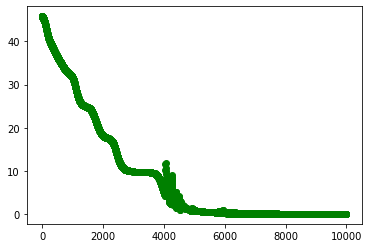

In [ ]:
%matplotlib inline
plt.scatter(np.arange(10000), error, c='green')
plt.show()

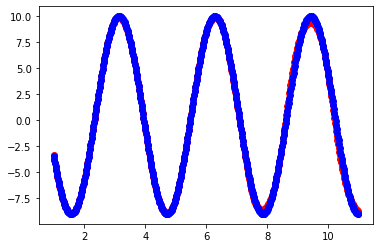

In [ ]:
%matplotlib inline
plt.scatter(x.numpy(), model(x).detach().numpy(), c='red')
plt.scatter(x.numpy(), y.numpy(), c='blue')
plt.show()